# Midterm Project
## Dariel Cruz Rodriguez
### DATA 11800

Perform analyses on this dataset (or a subset of this dataset) that will yield the following:

- **5 graphs/plots**
    - must have at least 3 different kinds of visualizations. You may choose from the following
discussed in class: histogram, line plot, bar graph, box and whisker plot, pie chart, or
scatter plot
    - at least 1 figure must depict multiple variables by either using subplots or plotting
multiple variables on the same axes. (See Data Visualization Part 2 lecture for examples)
- **2 tables**
    - tables must provide summative information, must be less than 20 rows displayed
- **A new column of data created by you based on data already in the dataset**

For each graph and table made, a markdown cell describing the following is required:
- A statement about what the graph/table shows
- A description of the analysis done to produce the graph/table

The markdown cell should be placed immediately below the graph/table output. Any analysis or processing done to the data must be shown within your report. You are encouraged to use resources online (e.g., StackOverflow, library documentation) or in-person (e.g., TAs, instructor office hours) to brainstorm ways that you may wish to analyze and process the data.

### Setup
---------------

In [236]:
# Set-up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

plt.style.use("fivethirtyeight")

BattleDeaths = pd.read_csv("Data-and-codebooks/PRIO Battle Deaths Dataset 3.0.csv")
BattleDeaths.head() # Seeing what the set looks like.

,id,year,bdeadlow,bdeadhig,bdeadbes,annualdata,source,bdversion,location,sidea,...,epend,ependdate,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region,version
0,1,1946,1000,9999,1000,2,1,3,Bolivia,Bolivia,...,1,7/21/46,-99.0,145,NaN,NaN,NaN,145.0,5,2009-4
1,1,1952,450,3000,-999,2,1,3,Bolivia,Bolivia,...,1,4/12/52,-99.0,145,NaN,NaN,NaN,145.0,5,2009-4
2,1,1967,25,999,82,2,1,3,Bolivia,Bolivia,...,1,10/16/67,-99.0,145,NaN,NaN,NaN,145.0,5,2009-4
3,2,1946,25,999,-999,0,0,3,Cambodia,France,...,0,NaN,NaN,220,NaN,NaN,NaN,811.0,3,2009-4
4,2,1947,25,999,-999,0,0,3,Cambodia,France,...,0,NaN,NaN,220,NaN,NaN,NaN,811.0,3,2009-4


In [237]:
BattleDeaths.describe() # Seeing what numerical values we have

,id,year,bdeadlow,bdeadhig,bdeadbes,annualdata,source,bdversion,incomp,int,...,startprec,startprec2,epend,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.0,1957.000000,1957.000000,...,1957.000000,1957.000000,1957.000000,405.0,1.957000e+03,1.750000e+02,1.200000e+02,7.200000e+01,1.957000e+03,1957.000000
mean,100.185999,1982.106285,2289.932550,10074.304037,3954.955544,1.109351,0.853858,3.0,1.444047,1.286152,...,2.407256,2.887072,0.205416,-99.0,1.133357e+05,1.942286e+87,1.086077e+13,2.234736e+73,6.659646e+14,3.228922
std,62.776123,16.327300,13164.587038,49086.513255,23835.910575,0.897223,0.353339,0.0,0.514177,0.452077,...,1.715206,1.738245,0.404109,0.0,4.988147e+06,2.569402e+88,8.377292e+13,1.896236e+74,2.082669e+16,0.969220
min,1.000000,1946.000000,0.000000,25.000000,-999.000000,0.000000,0.000000,3.0,1.000000,1.000000,...,1.000000,1.000000,0.000000,-99.0,-9.900000e+01,2.000000e+00,2.000000e+00,2.000000e+00,-9.975000e+04,1.000000
25%,38.000000,1970.000000,25.000000,677.000000,-999.000000,0.000000,1.000000,3.0,1.000000,1.000000,...,1.000000,1.000000,0.000000,-99.0,4.830000e+02,3.650000e+02,6.350000e+02,5.200000e+02,5.170000e+02,3.000000
50%,94.000000,1984.000000,140.000000,999.000000,100.000000,1.000000,1.000000,3.0,1.000000,1.000000,...,1.000000,3.000000,0.000000,-99.0,6.450000e+02,7.310000e+02,7.320000e+02,8.160000e+02,6.660000e+02,3.000000
75%,141.000000,1995.000000,1000.000000,5000.000000,1000.000000,2.000000,1.000000,3.0,2.000000,2.000000,...,4.000000,5.000000,0.000000,-99.0,7.750000e+02,4.020685e+05,8.040000e+02,2.252303e+15,7.750000e+02,4.000000
max,260.000000,2008.000000,322348.000000,763002.000000,497500.000000,2.000000,1.000000,3.0,3.000000,2.000000,...,7.000000,7.000000,1.000000,-99.0,2.206662e+08,3.399000e+89,6.516460e+14,1.609010e+75,6.516460e+17,5.000000


In [238]:
BattleDeaths.dtypes # Identifying what columns data types are off and need to be fixed.

id              int64
year            int64
bdeadlow        int64
bdeadhig        int64
bdeadbes        int64
annualdata      int64
source          int64
bdversion       int64
location       object
sidea          object
sidea2nd       object
sideb          object
sideb2nd       object
incomp          int64
terr           object
int             int64
cumint          int64
type            int64
startdate      object
startprec       int64
startdate2     object
startprec2      int64
epend           int64
ependdate      object
ependprec     float64
gwnoa           int64
gwnoa2nd      float64
gwnob         float64
gwnob2nd      float64
gwnoloc       float64
region          int64
version        object
dtype: object

In [239]:
BattleDeaths[['sidea','sidea2nd','sideb','sideb2nd','terr','startdate','startdate2','startprec2','ependdate','version']] # Seeing what the 'objects' are

,sidea,sidea2nd,sideb,sideb2nd,terr,startdate,startdate2,startprec2,ependdate,version
0,Bolivia,NaN,Popular Revolutionary Movement,NaN,NaN,6/1/46,6/1/46,4,7/21/46,2009-4
1,Bolivia,NaN,MNR,NaN,NaN,6/1/46,4/9/52,1,4/12/52,2009-4
2,Bolivia,NaN,ELN,NaN,NaN,6/1/46,3/1/67,3,10/16/67,2009-4
3,France,NaN,Khmer Issarak,NaN,Cambodia,8/1/46,8/1/46,3,NaN,2009-4
4,France,NaN,Khmer Issarak,NaN,Cambodia,8/1/46,8/1/46,3,NaN,2009-4
...,...,...,...,...,...,...,...,...,...,...
1952,Russia (Soviet Union),NaN,Forces of the Caucasus Emirate,NaN,Caucasus Emirate,10/9/07,11/28/07,1,NaN,2009-4
1953,Russia (Soviet Union),NaN,Forces of the Caucasus Emirate,NaN,Caucasus Emirate,10/9/07,11/28/07,1,NaN,2009-4
1954,India,NaN,DHD – BW,NaN,Dimaraji,12/6/05,10/30/08,1,NaN,2009-4
1955,India,NaN,PULF,NaN,Islamic State,12/13/04,11/9/08,1,NaN,2009-4


In [240]:
# Checking for missing values
missing_data = BattleDeaths.isnull().sum()
missing_data

# Removing missing values and replacing those missing values with the average between bdeadlow and bdeadhigh
BattleDeaths['bdeadbes'].replace(-999, np.nan, inplace=True)
BattleDeaths['ependprec'].replace(-99, np.nan, inplace=True)
BattleDeaths['bdeadbes'] = BattleDeaths.apply(
    lambda row: np.mean([row['bdeadlow'], row['bdeadhig']]) if np.isnan(row['bdeadbes']) else row['bdeadbes'],
    axis=1
) # Learned about lambda after searching through pandas documentation: https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

/var/folders/h3/986v19c545jf_r17m_vfsb880000gn/T/ipykernel_48544/669577666.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  BattleDeaths['bdeadbes'].replace(-999, np.nan, inplace=True)
/var/folders/h3/986v19c545jf_r17m_vfsb880000gn/T/ipykernel_48544/669577666.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [241]:
# Making all countries uppercase to account for lower/upper case, likely not an issue but can never be too sure!
BattleDeaths['location'] = BattleDeaths['location'].str.upper()
BattleDeaths['sidea'] = BattleDeaths['sidea'].str.upper()
BattleDeaths['sidea2nd'] = BattleDeaths['sidea2nd'].str.upper()
BattleDeaths['sideb'] = BattleDeaths['sideb'].str.upper()
BattleDeaths['sideb2nd'] = BattleDeaths['sideb2nd'].str.upper()

In [242]:
# Removing duplicates, if there are any
Battledeathsprior = len(BattleDeaths)
BattleDeaths = BattleDeaths.drop_duplicates(subset=['id', 'year', 'location'])
print("Duplicate observations dropped:", Battledeathsprior-len(BattleDeaths)) # How many duplicates did we drop?

Duplicate observations dropped: 0


In [243]:
BattleDeaths.head()

,id,year,bdeadlow,bdeadhig,bdeadbes,annualdata,source,bdversion,location,sidea,...,epend,ependdate,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region,version
0,1,1946,1000,9999,1000.0,2,1,3,BOLIVIA,BOLIVIA,...,1,7/21/46,NaN,145,NaN,NaN,NaN,145.0,5,2009-4
1,1,1952,450,3000,1725.0,2,1,3,BOLIVIA,BOLIVIA,...,1,4/12/52,NaN,145,NaN,NaN,NaN,145.0,5,2009-4
2,1,1967,25,999,82.0,2,1,3,BOLIVIA,BOLIVIA,...,1,10/16/67,NaN,145,NaN,NaN,NaN,145.0,5,2009-4
3,2,1946,25,999,512.0,0,0,3,CAMBODIA,FRANCE,...,0,NaN,NaN,220,NaN,NaN,NaN,811.0,3,2009-4
4,2,1947,25,999,512.0,0,0,3,CAMBODIA,FRANCE,...,0,NaN,NaN,220,NaN,NaN,NaN,811.0,3,2009-4


In [244]:
BattleDeaths['sidea2nd'].isna()

0       True
1       True
2       True
3       True
4       True
        ... 
1952    True
1953    True
1954    True
1955    True
1956    True
Name: sidea2nd, Length: 1957, dtype: bool

In [245]:
# Defining region names
regions = {1: 'Europe', 2: 'Middle East', 3: 'Asia', 4:'Africa', 5:'Americas'}
BattleDeaths['region'] = BattleDeaths['region'].map(regions)

# Defining ranges that we can use later on
BattleDeathsPost2000 = BattleDeaths[BattleDeaths['year'] >= 2000]
BattleDeathsPre2000 = BattleDeaths[BattleDeaths['year'] < 2000]
BattleDeathsOnlyTwoSides = BattleDeaths[(BattleDeaths['sidea2nd'].isna() == True) & (BattleDeaths['sideb2nd'].isna() == True)]
TotalWarCount_Location = BattleDeaths['location'].value_counts().reset_index()
TotalWarCount_epend = BattleDeaths['epend'].value_counts().reset_index()

# Adding columns for decade to help with analysis later on, 
BattleDeaths['decade'] = (BattleDeaths['year'] // 10) * 10

------------

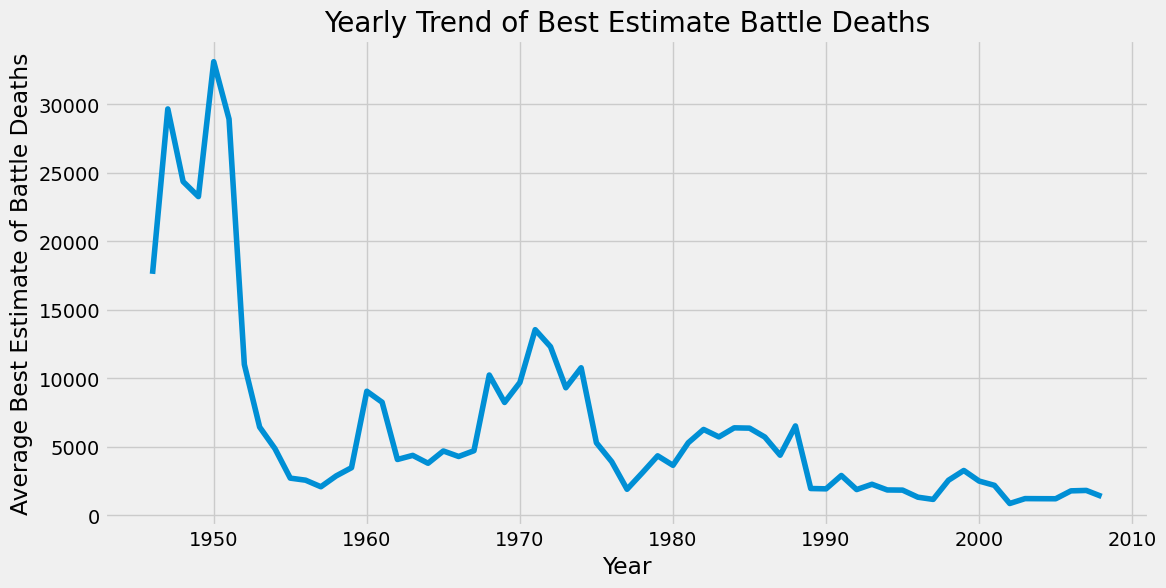

In [246]:
# Graph 1
plt.figure(figsize=(12, 6))
sns.lineplot(data=BattleDeaths, x='year', y='bdeadbes', estimator='mean', errorbar=None)
plt.title('Yearly Trend of Best Estimate Battle Deaths')
plt.xlabel('Year')
plt.ylabel('Average Best Estimate of Battle Deaths')
plt.show()

### Graph 1 - Yearly Trend of Best Estimate Battle Deaths (Line Graph)
- **Statement about what the graph/table shows:** The line plot shows the average deaths for any war in a specific year. Around 1950, there were more average deaths per war per year (this plot measures average, not total) than the rest of the dataset. Every year thereafter over time, average deaths per war have decreased.
- **A description of the analysis done to produce the graph/table:** To produce the graph, I made a line plot with year on the x-axis and bdeadbes on the y-axis. Some values for `bdeadbes` were missing, and so with any values that had `-999`, I those values with the average between `bdeadlow` and `bdeadhig` to avoid the plot having errors processing NaN values, I used `np.mean()` to accomplish this. Since in seaborn, the confidence interval is set on by default, I set the confidence interval off by putting `errorbar=none`, so we only have the line and not the confidence interval since that is irrelevant to the analysis in this graph. Since our aim to show a change over time, the line plot is best for showing changes in data per year over a long period of time. Also, since our y-axis is a continuous numerical variable, we used a line plot.

------------

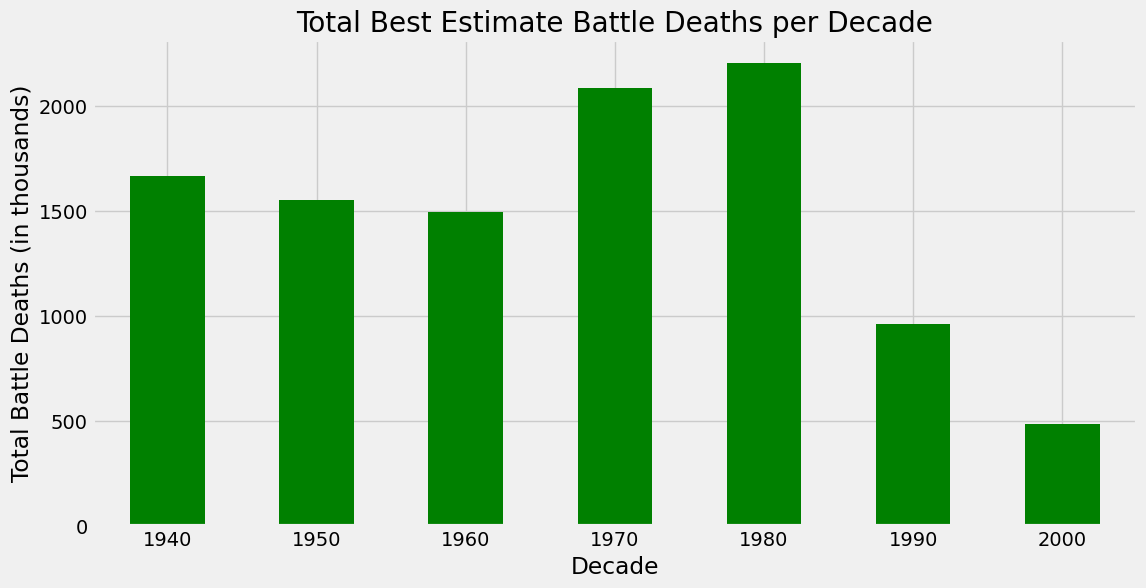

In [247]:
# Graph 2
decade_summary = BattleDeaths.groupby('decade')['bdeadbes'].sum()

plt.figure(figsize=(12, 6))
(decade_summary / 1000).plot(kind='bar', color='green')
plt.title('Total Best Estimate Battle Deaths per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Battle Deaths (in thousands)')
plt.xticks(rotation=360)
plt.show()

### Graph 2 - Total Best Estimate Battle Deaths per Decade (Bar Plot)
- **Statement about what the graph/table shows:** The bar plot shows the total estimated deaths for wars within any specific decade. More total deaths occured overall in the 1980 and 1970 decades, the least amount of total deaths per decade occured recently in 2000. Although on Graph 1, we saw more deaths occured per war on average in the 50s/early decades, this graph shows us the actual estimated total of deaths occured most in the 70s and 80s.
- **A description of the analysis done to produce the graph/table:** The dataset was grouped by decade by creating a new categorical variable `decade` that shows the decade for each record. I created the variable by dividing the year by 10, and then multiplying by 10 to get the decade start year (e.g., 1946 becomes 1940). For each category in `decade`, the total battle deaths (`bdeadbes` column) were summed in each category to get the total deaths per decade. We used this new aggregated data to create a bar plot, where the height represents total battle deaths per decade and the each bar represents a decade from 1940 to 2000.

------------

<Figure size 1200x600 with 0 Axes>

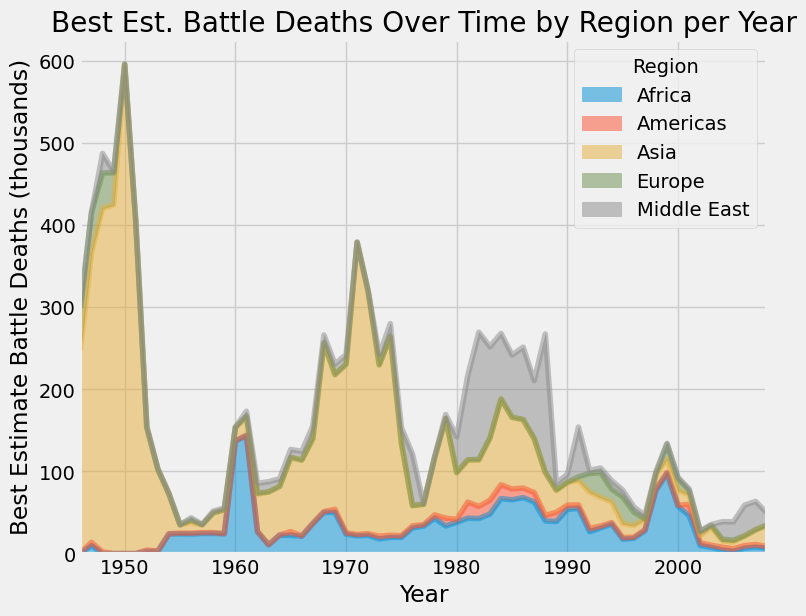

In [248]:
# Graph 3
stacked_data = BattleDeaths.groupby(['year', 'region'])['bdeadbes'].sum().unstack()

plt.figure(figsize=(12, 6))
(stacked_data/1000).plot(kind='area', stacked=True, alpha=0.5)
plt.title('Best Est. Battle Deaths Over Time by Region per Year')
plt.xlabel('Year')
plt.xlim(BattleDeaths['year'].min(),BattleDeaths['year'].max())  # For some reason the x axis was showing weird numbers so setting upper and lower limits should do the trick.
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False) # This snippet was retrieved from Stack Overflow (https://stackoverflow.com/questions/24171064/remove-axis-label-offset-by-default)
plt.ylabel('Best Estimate Battle Deaths (thousands)')
plt.legend(title='Region')
plt.tight_layout(pad=-3) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.show()

### Graph 3 - Estimated Battle Deaths Over Time By Region (Stacked Area Plot)
- **Statement about what the graph/table shows:** The stacked area plot shows the total Best Estimated Battle Deaths in any given year, for any given region. There is a pronounced peak for all regions during the 1940s, likely due to World War II, followed by varied intensities of conflict across different regions. The Middle East, Asia, and Europe show consistently high deaths in each peak and are close in death counts in most observations. The peaks line up generally with what we found in Graph 1, and suggests that those three countries are the ones influencing the analysis of the overall data the most, since the other regions take on different peaks and shape.
- **A description of the analysis done to produce the graph/table:** I grouped `BattleDeaths` by both `year` and `region` to categorize data along two dimensions. `bdeadbes` was summed up for each group, giving us the total death count per region for each year. I unstacked the resulting grouped data  so that each region's annual death totals became separate columns, with years as the index. I also scaled the y-axis by dividing it by 1000 to provide better viewability, the y axis is shown in thousands. With this new data, I plotted it on matplotlib using `kind='area'` and `stacked='True` to create a stacked area plot. I made the areas transparent using `alpha=0.5` to help distinguish overlapping regions. The x-axis was initially offset in a weird way by default, but I found out that there is a workaround on Stack Overflow to disable it. I added a legend to distinguish the regions by color.


------------

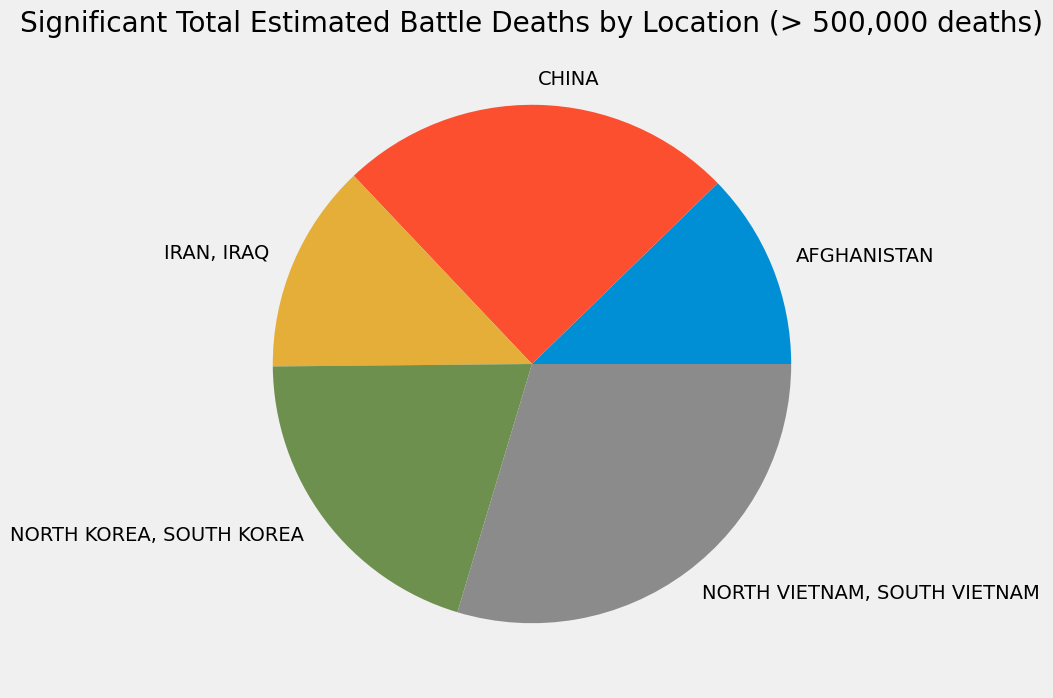

In [249]:
# Graph 4
location_deaths = BattleDeaths.groupby('location')['bdeadbes'].sum()
significant_location_deaths = location_deaths[location_deaths > 500000]

plt.figure(figsize=(10, 8))
significant_location_deaths.plot(kind='pie')
plt.title('Significant Total Estimated Battle Deaths by Location (> 500,000 deaths)')
plt.ylabel(' ')  # Hiding the y-axis label
plt.show()

### Graph 4 - Significant Total Estimated Battle Deaths by Location (Pie Chart)
- **Statement about what the graph/table shows:** The pie chart shows the proportion of deaths that occured in locations with 500,000 or more total deaths. 5 Locations generally share the same proportion of deaths at the very top (>500,000 deaths), but North/South Vietnam takes up the largest proportion of the pie, China following close to second.
- **A description of the analysis done to produce the graph/table:**  To put together the pie chart, I grouped `bdeadbes` with `location` and assigned it to the variable `location_deaths`. This grouped subset shows the sum of `bdeadbes` by `location`. I assigned another variable `significant_location_deaths` to a filtered version of the `location_deaths` subset to show only locations that had a total best estimate deaths of 500,000 or greater. Without this filter, the pie chart had too many variables to fit on one pie chart and made the graph undreadable. I used matplotlib to plot this using the `type=pie` value to visualize this subset and group on a pie chart.

------------

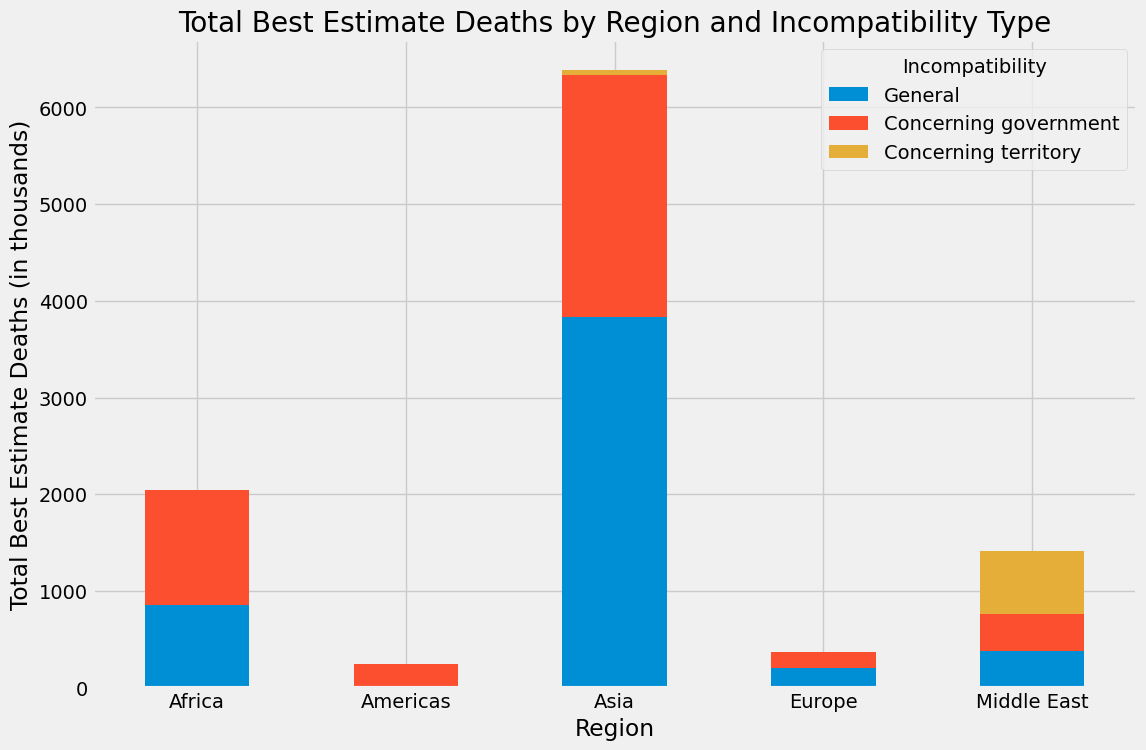

In [250]:
# Graph 5

Region_IncompSum = BattleDeaths.groupby(['region', 'incomp'])['bdeadbes'].sum().unstack(fill_value=0) # Grouping summed data by region and incompatibility type

(Region_IncompSum/1000).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Best Estimate Deaths by Region and Incompatibility Type')
plt.xlabel('Region')
plt.ylabel('Total Best Estimate Deaths (in thousands)')
plt.legend(['General', 'Concerning government','Concerning territory'],title='Incompatibility')
plt.xticks(rotation = 360)
plt.show()

### Graph 5 - Total Best Estimate Deaths by Region and Incompatibility Type (Stacked Bar Plot)
- **Statement about what the graph/table shows:** The stacked bar plot shows the total Best Estimated Deaths by region, and the proportion of each region's reason for the conflict/incompatibility is stacked in each bar. Asia has the highest sum of Best Estimate Deaths out of all regions, with a majority of those deaths occuring in conflicts not related to government or territory, and the second largest proportion of Asia deaths occuring in wars related to government (such as overthrowing a government). The Middle East has almost an equal distribution of conflicts regarding government, territory, and other disputes. The Americas only has had conflicts regarding government.
- **A description of the analysis done to produce the graph/table:** I created a subset of the dataset by grouping data by region and incompatibility type and took the sums of deaths per region, then assigned this to the variable `Region_IncompSum`. To scale the y-axis for visualization, I divided the `Region_IncompSum` by 1000 to show deaths in thousands, because otherwise the y-axis would be too large to fully show (it would appear as 1e+...). I used matplotlib and assigned the plot `kind=bar` and `stacked=True` to create a stacked bar plot. The colors were automatically assigned by matplotlib. I adjusted the names in the legend from the number type of conflict to the name associated with the number in the code key document. Lastly, I rotated the values in the x axis by 360 using `plt.xticks` to preserve as much space as possible for the bars.

------------

In [251]:
BattleDeathsPre2000_AvgDeaths = BattleDeathsPre2000.groupby('region')['bdeadbes'].mean().reset_index()
BattleDeathsPre2000_AvgDeaths.rename(columns={'bdeadbes': 'Average Deaths per conflict Pre-2000'}, inplace=True)

BattleDeathsPost2000_AvgDeaths = BattleDeathsPost2000.groupby('region')['bdeadbes'].mean().reset_index()
BattleDeathsPost2000_AvgDeaths.rename(columns={'bdeadbes': 'Average Deaths per conflict Post-2000'}, inplace=True)

AverageDeaths_Region = pd.merge(BattleDeathsPre2000_AvgDeaths, BattleDeathsPost2000_AvgDeaths, on='region', how='outer')

AverageDeaths_Region

,region,Average Deaths per conflict Pre-2000,Average Deaths per conflict Post-2000
0,Africa,4034.272824,1410.680952
1,Americas,1364.661184,1924.131579
2,Asia,8779.007022,994.327068
3,Europe,3664.593407,2314.214286
4,Middle East,5577.288210,4335.580645


### Table 1 - Average Deaths per conflict by Region Pre-2000 vs Post-2000
- **Statement about what the graph/table shows:** The table shows the average deaths in a war in any given region. Across all regions except the Americas, there are less deaths on average per conflict after the year 2000 than before the year 2000, presumably because there are less conflicts after the year 2000. Among regions that had a decrease in average deaths per conflict, the Middle East had the smallest decrease, suggesting that war continues to be similarly as deadly post-2000 compared to pre-2000 levels.
- **A description of the analysis done to produce the graph/table:** I tooked the predefined filtered subsets from the cleaning stage `BattleDeathsPre2000` and `BattleDeathsPost2000` which only has deaths with `year` being greater or less than 2000 and grouped the average deaths by `region` and `bdeadbes`. I took the grouped data and assigned them to `BattleDeathsPre2000_AvgDeaths` and `BattleDeathsPost2000_AvgDeaths`. I reset the index to prevent problems in merging the two tables later on. I renamed the columns in each table to what they would be in the final table, and then I used `pd.merge` to perform an `outer` merge on the two tables on the `region` column.

------------

In [252]:
# Table 2
thirdParty = BattleDeaths[BattleDeaths['sidea2nd'].notna() | BattleDeaths['sideb2nd'].notna()]
noThirdParty = BattleDeaths[~(BattleDeaths['sidea2nd'].notna() | BattleDeaths['sideb2nd'].notna())]

thirdParty_Region = thirdParty.groupby('region').size()
noThirdParty_Region = noThirdParty.groupby('region').size()

ThirdParties = pd.DataFrame({
    'Has Third Party Actor (either side)': thirdParty_Region,
    'No Third Party Actor': noThirdParty_Region,
})

ThirdParties.loc['Total'] = ThirdParties.sum()

ThirdParties

,Has Third Party Actor (either side),No Third Party Actor
region,,
Africa,81,495
Americas,8,163
Asia,93,752
Europe,10,95
Middle East,26,234
Total,218,1739


### Table 2 - Third Party Actors by Region
- **Statement about what the graph/table shows:** The table shows the amount of conflicts with or without a third party actor, by region. A large majority of conflicts have no third party actor, which is a 2nd country that has joined a conflict in support of either side of a conflict. The largest proportion of third party actors occurs in Asia and Africa, and the smallest proportion of third party actors is in the Americas. About 12.5% of all conflicts had a third party actor.
- **A description of the analysis done to produce the graph/table:** I created two subsets, `thirdparty` and `noThirdParty` which had either only conflicts that had either a value in `sidea2nd` or `sideb2nd`, or conflicts that had the opposite (which I designated by putting `~` before the filter for the second subsest), conflicts without a value in `sidea2nd` or `sideb2nd`. I took these two subsets and grouped them by region, and added `.size()` to get the total amount of conflicts by region. With this, I created a new DataFrame using `pd.DataFrame` and put a dictionary with the labels as the columns and our regions + sums as the rows, I assigned this to a new table called `ThirdParties`. After making the table, I used `.loc` to create a new row, since `.loc` creates a new row if it cannot locate the given string as a row that exists. I defined this new row with the sum of both columns. This created the row `Total` and gave us the total for conflicts with and without a third party actor.

------------

In [253]:
# A new column of data created by you based on data already in the dataset
def fix_year(x):
    if x is not pd.NaT and 2040 <= x.year <= 2099:
        return x.replace(year=x.year - 100)
    return x
BattleDeaths['ependdate'] = pd.to_datetime(BattleDeaths['ependdate'], format='%m/%d/%y', errors='coerce').apply(fix_year)
BattleDeaths['startdate'] = pd.to_datetime(BattleDeaths['startdate'], format='%m/%d/%y', errors='coerce').apply(fix_year)
BattleDeaths['Length_Battle'] = (BattleDeaths['ependdate'] - BattleDeaths['startdate']).dt.days # Length of the battle in days

In [254]:
BattleDeaths[['year','location','bdeadbes','startdate','ependdate','Length_Battle']].head()

,year,location,bdeadbes,startdate,ependdate,Length_Battle
0,1946,BOLIVIA,1000.0,1946-06-01,1946-07-21,50.0
1,1952,BOLIVIA,1725.0,1946-06-01,1952-04-12,2142.0
2,1967,BOLIVIA,82.0,1946-06-01,1967-10-16,7807.0
3,1946,CAMBODIA,512.0,1946-08-01,NaT,NaN
4,1947,CAMBODIA,512.0,1946-08-01,NaT,NaN


### New Column - Length_Battle
- **Statement about what the column shows:** The total length of each battle, for battles that have an end date, in days. 
- **A description of the analysis done to produce the column:** I converted the column `startdate` and `ependdate` from strings to `pd.datetime` data types, then I made a new column with the difference between the end date and start date to get the total length of the conflict. I added `dt.days` to only get the amount of days, which I found in the pandas documentation. I assigned this difference to a new column called `Length_Battle`. In converting the columns, I used `errors='coerce'` to convert invalid data/conflicts with no end date to `NaN` in the `Length_Battle` column. By default, `pd.to_datetime` was converting the years to the 21st century (ex: "46" would be converted to 2046 instead of 1946), so I used a workaround from Stack Overflow to create a function `fix_year` that converts any year after 2024 to the 20th century by substracting 100 years from the produced year. I applied it to the converted column by using `.apply(fix_year)`.





------------

In [255]:
# Exporting the cleaned data for my own records
BattleDeaths.to_csv('Data-and-codebooks/BattleDeathsClean.csv')